## **1. Data Loading & Description**

In [1]:
pip install scikit-learn

In [2]:
pip install imblearn

In [3]:
pip install shap

In [4]:
pip install xgboost

In [5]:
pip install catboost

In [6]:
pip install lightgbm

In [7]:
# Import Library Python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import shap

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV, train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import RFE
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import RidgeClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import RidgeCV
from time import time
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
import csv
from scipy.stats import randint
from scipy.stats import uniform

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [8]:
creditcard = pd.read_csv('creditcard.csv', sep=',')
creditcard

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [9]:
creditcard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

## **2. Preprocessing Data**

In [10]:
# Hitung jumlah churn dan non-churn
creditcard['Class'].value_counts()

,count
Class,
0,284315
1,492


### Data Balancing

In [11]:
# # Hitung jumlah churn dan non-churn
# WDBC['Output'].value_counts()

In [12]:
# X = new_churn.drop(['IS_CHURN', 'LOS_GROUP', 'PAYMENT_METHOD', 'KAT_HVC_NEW'], axis=1)
# y = new_churn['IS_CHURN']

In [13]:
# smote = SMOTEENN()
# X_resampled, y_resampled = smote.fit_resample(X_new, y)

# print("The new data contains {} rows".format(X_resampled.shape[0]))

In [14]:
# y_resampled.value_counts()

In [15]:
# # Hitung distribusi dari nilai y_resampled
# y_counts = y_resampled.value_counts()

# # Buat pie chart berdasarkan distribusi y_resampled
# plt.pie(
#     y_counts,
#     labels=['Not-Churn Customer', 'Churn Customer'],
#     autopct='%1.1f%%',
#     startangle=90,
#     colors=['#FF5733', 'yellow'],
#     explode=(0, 0.1)
# )

# # Tambahkan judul
# plt.title('Churn - Not-Churn %')

# # Tampilkan plot
# plt.show()

### Data Splitting

In [16]:
X = creditcard.drop(['Class'], axis=1)
y = creditcard['Class']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [18]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((227845, 30), (56962, 30), (227845,), (56962,))

## **3. Build Model**

In [19]:
# Fungsi untuk mencetak laporan klasifikasi, akurasi, confusion matrix, AUC & ROC
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print('Classification report:\n', metrics.classification_report(y_test, y_pred))
    print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
    print('Confusion Matrix:\n', metrics.confusion_matrix(y_test, y_pred))

    # Menghitung AUC & ROC
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test)[:,1]
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        roc_auc = auc(fpr, tpr)
        print('AUC:', roc_auc)

        # Plot ROC curve
        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic')
        plt.legend(loc="lower right")
        plt.show()
    elif hasattr(model, "decision_function"):
        y_scores = model.decision_function(X_test)
        fpr, tpr, _ = roc_curve(y_test, y_scores)
        roc_auc = roc_auc_score(y_test, y_scores)
        print('AUC:', roc_auc)

        # Plot ROC curve
        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic')
        plt.legend(loc="lower right")
        plt.show()
    else:
        print("Model does not support predict_proba method.")

# def evaluate_models(models, X_test, y_test):
#     plt.figure()

#     for model_name, model in models.items():
#         y_pred = model.predict(X_test)
#         print(f'Classification report for {model_name}:\n', metrics.classification_report(y_test, y_pred))
#         print(f'Accuracy for {model_name}:', metrics.accuracy_score(y_test, y_pred))
#         print(f'Confusion Matrix for {model_name}:\n', metrics.confusion_matrix(y_test, y_pred))

#         if hasattr(model, "predict_proba"):
#             y_pred_proba = model.predict_proba(X_test)[:,1]
#             fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
#             roc_auc = roc_auc_score(y_test, y_pred_proba)
#         elif hasattr(model, "decision_function"):
#             y_scores = model.decision_function(X_test)
#             fpr, tpr, _ = roc_curve(y_test, y_scores)
#             roc_auc = roc_auc_score(y_test, y_scores)
#         else:
#             print(f"Model {model_name} does not support predict_proba or decision_function method.")
#             continue

#         plt.plot(fpr, tpr, lw=2, label=f'{model_name} (AUC = {roc_auc:.2f})')

#     plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
#     plt.xlim([0.0, 1.0])
#     plt.ylim([0.0, 1.05])
#     plt.xlabel('False Positive Rate')
#     plt.ylabel('True Positive Rate')
#     plt.title('Receiver Operating Characteristic')
#     plt.legend(loc="lower right")
#     plt.show()

In [20]:
# models = {
#     'Decision Tree': DecisionTreeClassifier(),
#     'Random Forest': RandomForestClassifier(),
#     'LogisticRegression':LogisticRegression(random_state=123),
#     'RidgeCV': RidgeClassifier(),
#     'XG Boost': XGBClassifier(),
#     'Catboost': CatBoostClassifier(verbose=0),
#     'Light GBM': LGBMClassifier(),
#     'KNN': KNeighborsClassifier(n_neighbors=3)
# }

# # Melatih dan mengevaluasi model
# for model in models.values():
#     model.fit(X_train, y_train)

# evaluate_models(models, X_test, y_test)

### Decision Tree

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56859
           1       0.73      0.75      0.74       103

    accuracy                           1.00     56962
   macro avg       0.86      0.87      0.87     56962
weighted avg       1.00      1.00      1.00     56962

Accuracy: 0.9990344440153085
Confusion Matrix:
 [[56830    29]
 [   26    77]]
AUC: 0.8735313909710565


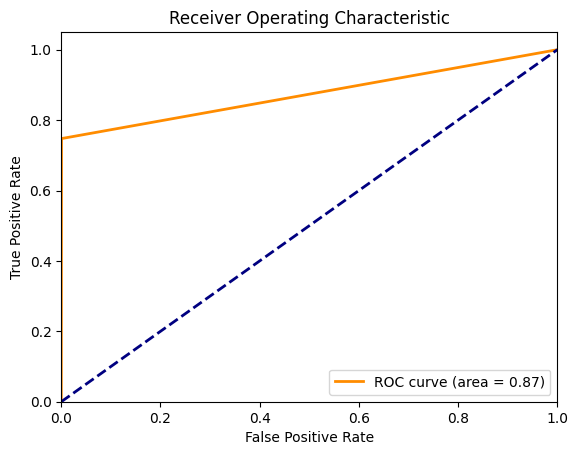

In [21]:
# Decision Tree
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
evaluate_model(dtree, X_test, y_test)

In [ ]:
# Hyperparameter Tuning
# Randomized Search
param_dist = {'max_depth': randint(1,20), 'min_samples_split': randint(2,20)}
dt = DecisionTreeClassifier()
rand_search = RandomizedSearchCV(dt, param_distributions=param_dist, n_iter=5, cv=5)
rand_search.fit(X_train, y_train)
best_dt = rand_search.best_estimator_
print('Best hyperparameters for Decision Tree:', rand_search.best_params_)

# Grid Search
parameters = {'max_depth': range(5,20,5), 'min_samples_split': range(2,20,5)}
grid_search = GridSearchCV(dt, parameters, cv=5)
grid_search.fit(X_train, y_train)

Best hyperparameters for Decision Tree: {'max_depth': 9, 'min_samples_split': 2}


In [ ]:
hasil_grid_df = pd.concat([pd.DataFrame(grid_search.cv_results_["params"]),pd.DataFrame(grid_search.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)

hasil_grid_df.to_csv ('hasil_grid_search_params_dt_ccfraud.csv', index = False, header=True)

In [ ]:
y_pred = best_dt.predict(X_test)
print('Classification report:\n', metrics.classification_report(y_test, y_pred))
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n', metrics.confusion_matrix(y_test, y_pred))

# Menghitung AUC & ROC
if hasattr(best_dt, "predict_proba"):
  y_pred_proba = best_dt.predict_proba(X_test)[:,1]
  fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
  roc_auc = auc(fpr, tpr)
  print('AUC:', roc_auc)

  # Plot ROC curve
  plt.figure()
  plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic')
  plt.legend(loc="lower right")
  plt.show()

In [ ]:
# Generate predictions with the best model
y_pred = best_dt.predict(X_test)
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [ ]:
# target_names = ['class 0', 'class 1']

# def classifaction_report_csv(report):
#     report_data = []
#     lines = report.split('\n')
#     for line in lines[2:-3]:
#         row = {}
#         row_data = line.split('      ')
#         row['class'] = row_data[0]
#         row['precision'] = float(row_data[1])
#         row['recall'] = float(row_data[2])
#         row['f1_score'] = float(row_data[3])
#         row['support'] = float(row_data[4])
#         report_data.append(row)
#     dataframe = pd.DataFrame.from_dict(report_data)
#     dataframe.to_csv('report_mnist.csv', index = False)

# #call the classification_report first and then our new function

# report = classification_report(y_test, y_pred, target_names=target_names)
# classifaction_report_csv(report)

### Random Forest

In [ ]:
# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
evaluate_model(rf, X_test, y_test)

In [ ]:
# Hyperparameter Tuning
# Randomized Search
param_dist = {'n_estimators': randint(10,500),
              'max_depth': randint(1,20)}
# Create a random forest classifier
rf = RandomForestClassifier()
# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf,
                                 param_distributions = param_dist,
                                 n_iter=5,
                                 cv=5)
# Fit the random search object to the data
rand_search.fit(X_train, y_train)
# Create a variable for the best model
best_rf = rand_search.best_estimator_
# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

# Grid Search
parameters = {'n_estimators':range(15,50,15), 'max_depth':range(5,20,5)}
grid_search = GridSearchCV(rf,
                                 parameters,
                                 cv=5)
grid_search.fit(X_train, y_train)

In [ ]:
hasil_grid_df = pd.concat([pd.DataFrame(grid_search.cv_results_["params"]),pd.DataFrame(grid_search.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)

hasil_grid_df.to_csv ('hasil_grid_search_params_rf_ccfraud.csv', index = False, header=True)

In [ ]:
y_pred = best_rf.predict(X_test)
print('Classification report:\n', metrics.classification_report(y_test, y_pred))
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n', metrics.confusion_matrix(y_test, y_pred))

# Menghitung AUC & ROC
if hasattr(best_rf, "predict_proba"):
  y_pred_proba = best_rf.predict_proba(X_test)[:,1]
  fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
  roc_auc = auc(fpr, tpr)
  print('AUC:', roc_auc)

  # Plot ROC curve
  plt.figure()
  plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic')
  plt.legend(loc="lower right")
  plt.show()

In [ ]:
# Generate predictions with the best model
y_pred = best_rf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

### Logistic Regression

In [ ]:
# Logistic Regression
logreg = LogisticRegression(random_state=123)
logreg.fit(X_train, y_train)
evaluate_model(logreg, X_test, y_test)

In [ ]:
# Random search for Logistic Regression
param_dist = {'C': uniform(0.1, 10), 'penalty': ['l1', 'l2', 'elasticnet', 'none']}
lr = LogisticRegression(solver='saga', max_iter=5000)
rand_search_lr = RandomizedSearchCV(lr, param_distributions=param_dist, n_iter=5, cv=5)
rand_search_lr.fit(X_train, y_train)
best_lr = rand_search_lr.best_estimator_
print('Best hyperparameters for Logistic Regression:', rand_search_lr.best_params_)

# Grid search for Logistic Regression
parameters = {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']}
grid_search_lr = GridSearchCV(lr, parameters, cv=5)
grid_search_lr.fit(X_train, y_train)

In [ ]:
hasil_grid_df = pd.concat([pd.DataFrame(grid_search.cv_results_["params"]),pd.DataFrame(grid_search.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)

hasil_grid_df.to_csv ('hasil_grid_search_params_lr_ccfraud.csv', index = False, header=True)

In [ ]:
y_pred = best_lr.predict(X_test)
print('Classification report:\n', metrics.classification_report(y_test, y_pred))
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n', metrics.confusion_matrix(y_test, y_pred))

# Menghitung AUC & ROC
if hasattr(best_lr, "predict_proba"):
  y_pred_proba = best_lr.predict_proba(X_test)[:,1]
  fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
  roc_auc = auc(fpr, tpr)
  print('AUC:', roc_auc)

  # Plot ROC curve
  plt.figure()
  plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic')
  plt.legend(loc="lower right")
  plt.show()

In [ ]:
# Generate predictions with the best model
y_pred = best_lr.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

### Ridge Classifier

In [ ]:
ridge = RidgeClassifier()
ridge.fit(X_train, y_train)
evaluate_model(ridge, X_test, y_test)

In [ ]:
# Random search for Ridge Classifier
param_dist = {'alpha': uniform(0.1, 10)}
ridge = RidgeClassifier()
rand_search_ridge = RandomizedSearchCV(ridge, param_distributions=param_dist, n_iter=5, cv=5)
rand_search_ridge.fit(X_train, y_train)
best_ridge = rand_search_ridge.best_estimator_
print('Best hyperparameters for Ridge Classifier:', rand_search_ridge.best_params_)

# Grid search for Ridge Classifier
parameters = {'alpha': [0.1, 1, 10]}
grid_search_ridge = GridSearchCV(ridge, parameters, cv=5)
grid_search_ridge.fit(X_train, y_train)

In [ ]:
hasil_grid_df = pd.concat([pd.DataFrame(grid_search.cv_results_["params"]),pd.DataFrame(grid_search.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)

hasil_grid_df.to_csv ('hasil_grid_search_params_ridge_ccfraud.csv', index = False, header=True)

In [ ]:
y_pred = best_ridge.predict(X_test)
print('Classification report:\n', metrics.classification_report(y_test, y_pred))
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n', metrics.confusion_matrix(y_test, y_pred))

# Menghitung AUC & ROC
if hasattr(best_ridge, "predict_proba"):
  y_pred_proba = best_ridge.predict_proba(X_test)[:,1]
  fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
  roc_auc = auc(fpr, tpr)
  print('AUC:', roc_auc)

  # Plot ROC curve
  plt.figure()
  plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic')
  plt.legend(loc="lower right")
  plt.show()

In [ ]:
# Generate predictions with the best model
y_pred = best_ridge.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

### XG Boost

In [ ]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
evaluate_model(xgb, X_test, y_test)

In [ ]:
# Random search for XGBoost
param_dist = {'n_estimators': randint(10,500), 'max_depth': randint(1,20)}
xgb = XGBClassifier()
rand_search_xgb = RandomizedSearchCV(xgb, param_distributions=param_dist, n_iter=5, cv=5)
rand_search_xgb.fit(X_train, y_train)
best_xgb = rand_search_xgb.best_estimator_
print('Best hyperparameters for XGBoost:', rand_search_xgb.best_params_)

# Grid search for XGBoost
parameters = {'n_estimators': range(15,50,15), 'max_depth': range(5,20,5)}
grid_search_xgb = GridSearchCV(xgb, parameters, cv=5)
grid_search_xgb.fit(X_train, y_train)

In [ ]:
hasil_grid_df = pd.concat([pd.DataFrame(grid_search.cv_results_["params"]),pd.DataFrame(grid_search.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)

hasil_grid_df.to_csv ('hasil_grid_search_params_xgb_ccfraud.csv', index = False, header=True)

In [ ]:
y_pred = best_xgb.predict(X_test)
print('Classification report:\n', metrics.classification_report(y_test, y_pred))
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n', metrics.confusion_matrix(y_test, y_pred))

# Menghitung AUC & ROC
if hasattr(best_xgb, "predict_proba"):
  y_pred_proba = best_xgb.predict_proba(X_test)[:,1]
  fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
  roc_auc = auc(fpr, tpr)
  print('AUC:', roc_auc)

  # Plot ROC curve
  plt.figure()
  plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic')
  plt.legend(loc="lower right")
  plt.show()

In [ ]:
# Generate predictions with the best model
y_pred = best_xgb.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

### Cat Boost

In [ ]:
catboost = CatBoostClassifier(verbose=0)  # verbose=0 untuk menonaktifkan output selama pelatihan
catboost.fit(X_train, y_train)
evaluate_model(catboost, X_test, y_test)

In [ ]:
# Random search for CatBoost
param_dist = {'iterations': randint(10,500), 'depth': randint(1,10)}
catboost = CatBoostClassifier(verbose=0)
rand_search_catboost = RandomizedSearchCV(catboost, param_distributions=param_dist, n_iter=5, cv=5)
rand_search_catboost.fit(X_train, y_train)
best_catboost = rand_search_catboost.best_estimator_
print('Best hyperparameters for CatBoost:', rand_search_catboost.best_params_)

# Grid search for CatBoost
parameters = {'iterations': range(50,200,50), 'depth': range(3,10,2)}
grid_search_catboost = GridSearchCV(catboost, parameters, cv=5)
grid_search_catboost.fit(X_train, y_train)

In [ ]:
hasil_grid_df = pd.concat([pd.DataFrame(grid_search.cv_results_["params"]),pd.DataFrame(grid_search.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)

hasil_grid_df.to_csv ('hasil_grid_search_params_catboost_ccfraud.csv', index = False, header=True)

In [ ]:
y_pred = best_catboost.predict(X_test)
print('Classification report:\n', metrics.classification_report(y_test, y_pred))
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n', metrics.confusion_matrix(y_test, y_pred))

# Menghitung AUC & ROC
if hasattr(best_catboost, "predict_proba"):
  y_pred_proba = best_catboost.predict_proba(X_test)[:,1]
  fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
  roc_auc = auc(fpr, tpr)
  print('AUC:', roc_auc)

  # Plot ROC curve
  plt.figure()
  plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic')
  plt.legend(loc="lower right")
  plt.show()

In [ ]:
# Generate predictions with the best model
y_pred = best_catboost.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

### Light GBM

In [ ]:
lgbm = LGBMClassifier()
lgbm.fit(X_train, y_train)
evaluate_model(lgbm, X_test, y_test)

In [ ]:
# Random search for LightGBM
param_dist = {'n_estimators': randint(10,500), 'max_depth': randint(1,20)}
lgbm = LGBMClassifier()
rand_search_lgbm = RandomizedSearchCV(lgbm, param_distributions=param_dist, n_iter=5, cv=5)
rand_search_lgbm.fit(X_train, y_train)
best_lgbm = rand_search_lgbm.best_estimator_
print('Best hyperparameters for LightGBM:', rand_search_lgbm.best_params_)

# Grid search for LightGBM
parameters = {'n_estimators': range(15,50,15), 'max_depth': range(5,20,5)}
grid_search_lgbm = GridSearchCV(lgbm, parameters, cv=5)
grid_search_lgbm.fit(X_train, y_train)

In [ ]:
hasil_grid_df = pd.concat([pd.DataFrame(grid_search.cv_results_["params"]),pd.DataFrame(grid_search.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)

hasil_grid_df.to_csv ('hasil_grid_search_params_lgbm_ccfraud.csv', index = False, header=True)

In [ ]:
y_pred = best_lgbm.predict(X_test)
print('Classification report:\n', metrics.classification_report(y_test, y_pred))
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n', metrics.confusion_matrix(y_test, y_pred))

# Menghitung AUC & ROC
if hasattr(best_lgbm, "predict_proba"):
  y_pred_proba = best_lgbm.predict_proba(X_test)[:,1]
  fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
  roc_auc = auc(fpr, tpr)
  print('AUC:', roc_auc)

  # Plot ROC curve
  plt.figure()
  plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic')
  plt.legend(loc="lower right")
  plt.show()

In [ ]:
# Generate predictions with the best model
y_pred = best_lgbm.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

### KNN

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
evaluate_model(knn, X_test, y_test)

In [ ]:
# Random search for KNN
param_dist = {'n_neighbors': randint(1,30), 'weights': ['uniform', 'distance']}
knn = KNeighborsClassifier()
rand_search_knn = RandomizedSearchCV(knn, param_distributions=param_dist, n_iter=5, cv=5)
rand_search_knn.fit(X_train, y_train)
best_knn = rand_search_knn.best_estimator_
print('Best hyperparameters for KNN:', rand_search_knn.best_params_)

# Grid search for KNN
parameters = {'n_neighbors': range(1,30,5), 'weights': ['uniform', 'distance']}
grid_search_knn = GridSearchCV(knn, parameters, cv=5)
grid_search_knn.fit(X_train, y_train)

In [ ]:
hasil_grid_df = pd.concat([pd.DataFrame(grid_search.cv_results_["params"]),pd.DataFrame(grid_search.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)

hasil_grid_df.to_csv ('hasil_grid_search_params_knn_ccfraud.csv', index = False, header=True)

In [ ]:
y_pred = best_knn.predict(X_test)
print('Classification report:\n', metrics.classification_report(y_test, y_pred))
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n', metrics.confusion_matrix(y_test, y_pred))

# Menghitung AUC & ROC
if hasattr(best_knn, "predict_proba"):
  y_pred_proba = best_knn.predict_proba(X_test)[:,1]
  fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
  roc_auc = auc(fpr, tpr)
  print('AUC:', roc_auc)

  # Plot ROC curve
  plt.figure()
  plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic')
  plt.legend(loc="lower right")
  plt.show()

In [ ]:
# Generate predictions with the best model
y_pred = best_knn.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();